# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [2]:
import numpy as np
import uproot as uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [3]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

In [4]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [5]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.670372,0.740995,0.158957,1.798278,440.984772,0.727932
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.246837,0.234,0.192390,0.777679,438.613037,0.489567
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.11096,0.131,0.192390,0.777679,438.613037,0.489567
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.755327,0.761996,0.986006,1.214413,431.785278,0.826329
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.242116,0.188,0.158957,1.857195,463.048309,1.271057
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.267746,0.346999,0.158957,1.857195,463.048309,1.271057
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.161958,0.099,0.158957,1.857195,463.048309,1.271057
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.280941,0.384999,0.194167,0.890958,445.648376,0.478177


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [6]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14477


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,135.860128,150.702255,0.292253,7,0.085661,530.910828,116.987373,59.918465,0.999991,0.923874,588.623657,-10.405384,115.640152,115.506828,-10.627339,588.769958,0.823004,0.450727,0.628995,0.257732,1.000000,0.000000,0.000000
1,39.970778,54.534897,0.076699,5,0.035500,71.817368,64.021904,159.108337,0.972112,0.862978,107.877533,100.91906,141.789291,141.777603,100.893150,107.805695,0.519082,0.236932,0.29,0.158957,4.493649,461.756073,NaN
2,90.848939,221.906387,45.194691,21,0.954428,395.940826,-115.626915,84.469421,0.99999,0.955882,292.925354,-12.134972,29.739176,38.629154,-35.059345,255.319946,1.512146,0.606191,0.517999,0.158957,1.272558,460.887512,0.383655
3,872.188891,67.099213,0.383327,21,0.998949,200.633423,-14.686756,217.527222,0.908941,-0.840451,142.652618,-42.123627,198.61467,198.515137,-41.788666,142.885315,0.972612,0.266233,0.295,0.158957,1.107254,461.065247,0.486252
4,58.905059,87.226944,0.49299,21,0.553395,651.098083,41.241753,137.930481,0.994876,0.934894,595.199036,10.118032,196.871506,197.316818,10.276834,595.341980,0.497928,0.311729,0.287,0.203440,0.856299,443.903168,0.332349
5,203.109704,57.303059,0.491806,21,0.095512,636.328125,-45.171848,112.224495,0.922297,0.858188,642.259094,-93.247948,142.015488,141.688049,-92.843468,642.091919,0.389007,0.243471,0.223,0.227020,0.443632,452.042816,0.243203
6,209.182062,97.487091,0.418923,21,0.442331,926.240051,-99.843262,81.702156,0.998321,0.934243,974.738403,-45.314087,18.372112,18.033941,-45.195606,974.943420,0.696935,0.334506,0.322999,0.195011,0.864567,458.924438,0.411228
7,93.851320,349.492615,0.213276,21,0.212328,904.222656,-73.220116,43.787495,1.0,0.987182,598.940369,88.076721,71.041977,71.043297,88.131798,599.147278,0.896755,0.890587,0.843997,0.186892,0.953337,430.984100,0.859200
8,123.600037,94.789452,0.548016,21,0.925927,152.964417,86.991447,123.485619,0.997851,0.924592,104.430588,33.404369,63.747181,64.134125,33.611286,104.743706,0.576956,0.328538,0.305,0.158957,0.770726,443.901947,0.332375
9,96.312742,384.041138,0.155762,21,0.440690,511.029907,41.64595,206.758865,1.0,0.989054,167.690353,-106.709915,130.909668,130.978226,-106.748917,167.553116,1.019313,0.968986,0.914997,1.396713,1.296134,433.149139,0.946702


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

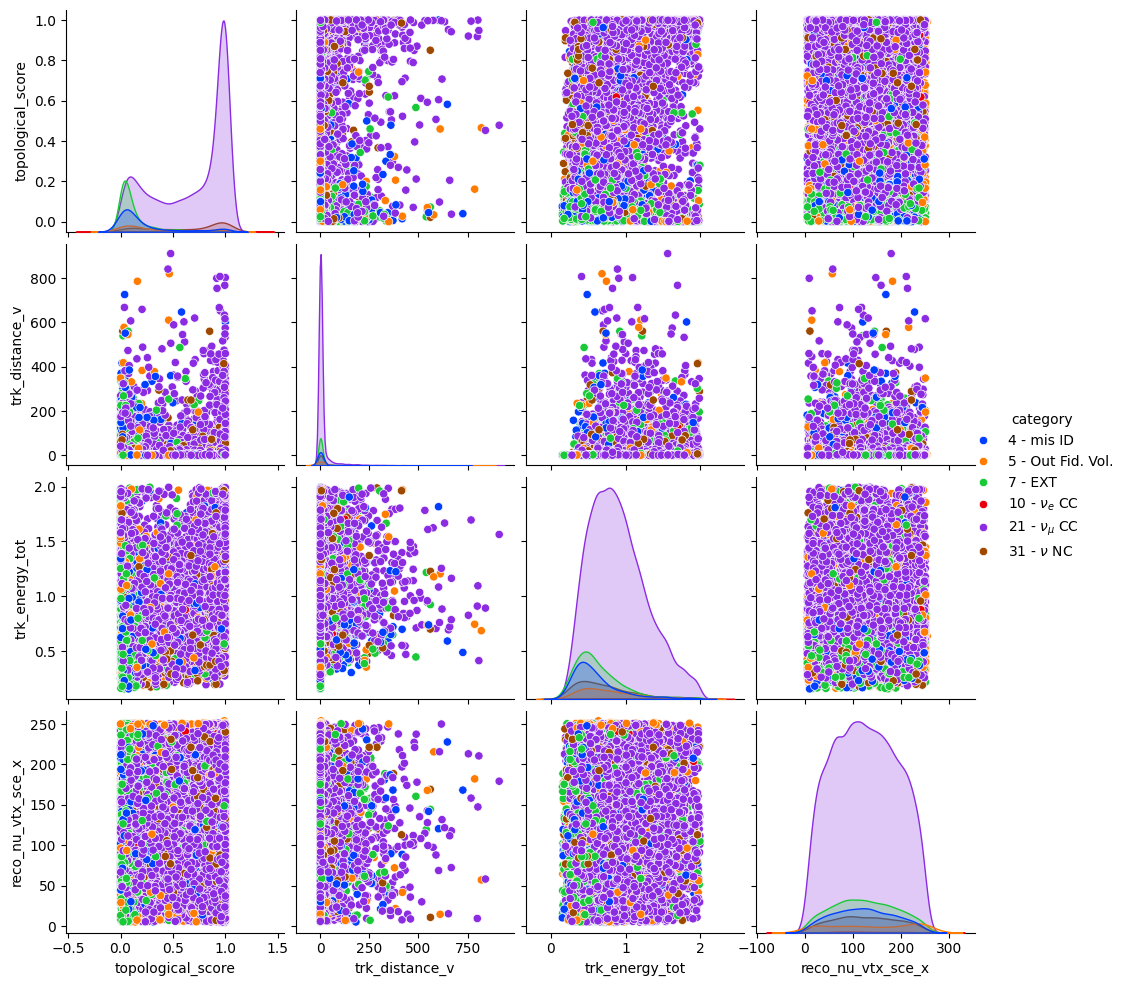

In [7]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [8]:
# Create a deep copy of MC_EXT_VIS without signal events
noSignalEvents = MC_EXT_VIS[MC_EXT_VIS.category != 21].copy(deep = True)

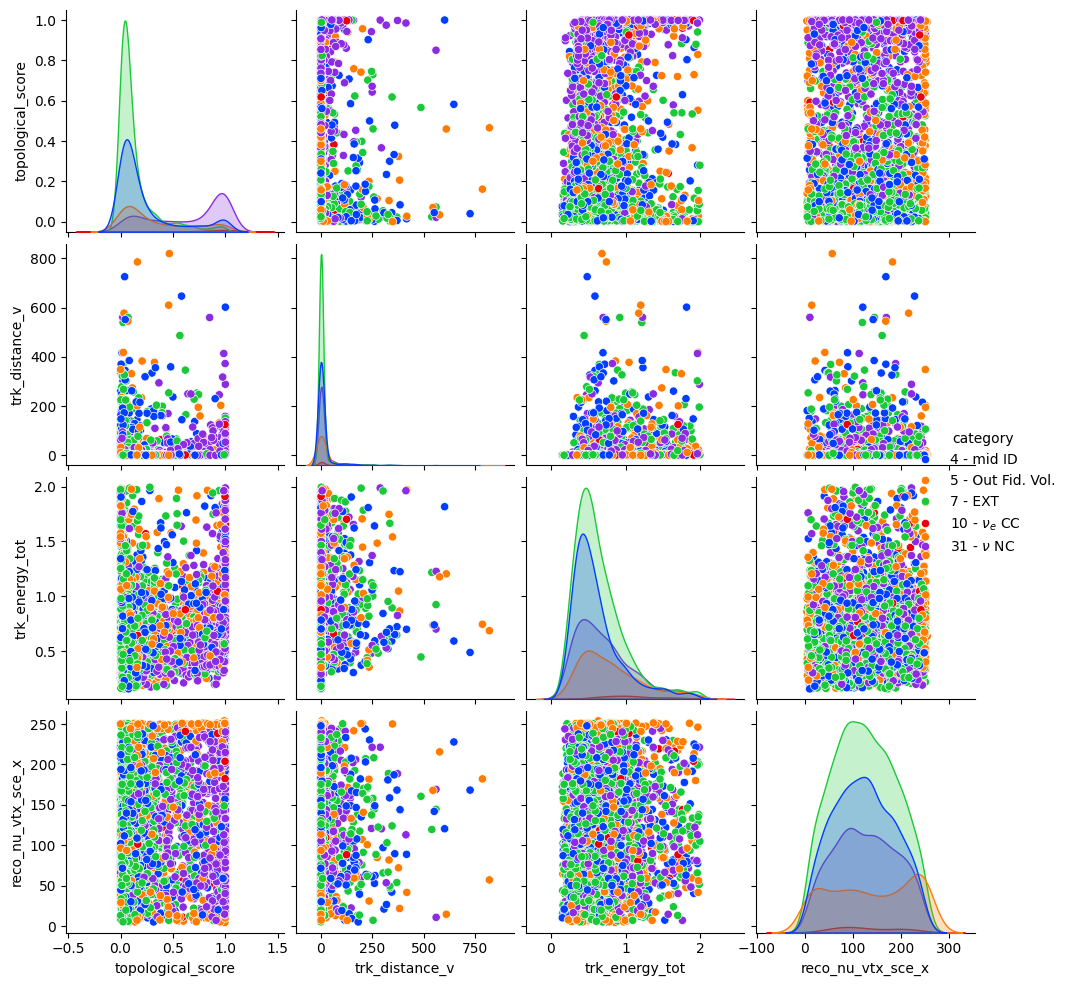

In [9]:
# Plot your background events using sns.pairplot
fig = sns.pairplot(noSignalEvents[variable_list], hue = 'category', palette = 'bright')

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

for t, l in zip(fig._legend.texts, ptype_no_mu):
   t.set_text(str(t.get_text()) + " - " + str(l))


In [10]:
# Make sure to delete dataframe copies if you no longer need them!
del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [11]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))

# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[(MC_EXT_ML.category != 21) & (MC_EXT_ML.category != 10)]

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  31906


In [12]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print("(X) (y) shape:")
print(np.shape(X))
print(np.shape(y))

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1) # 80/20 training/test split

# NOTE: Could improve the training data by equally splitting it between each event type
# 7, 4, 5, 31
# Combine EXT and cosmic - 7, 4 as they should be similar

count = {}

for index, id in enumerate(y_test):
    if id == 4:
        y_test[index] = 7

# Get event type with minimum data points
for index, id in enumerate(y_train):
    if id == 4:
        y_train[index] = 7
        id = 7

    if id not in count:
        count[id] = 0
    count[id] += 1

min_count = -1
for id in count:
    if count[id] < min_count or min_count == -1:
        min_count = count[id]
    count[id] = 0

# Remove extra samples
removeIndices = []
for index, id in enumerate(y_train):
    if count[id] >= min_count:
        removeIndices.append(index)
    count[id] += 1


x_train = np.delete(x_train, removeIndices, 0)
y_train = np.delete(y_train, removeIndices)

# Print the shape, should now be 
print("\n(x_train) (y_train) shape: ")
print(np.shape(x_train))
print(np.shape(y_train))


(X) (y) shape:
(31906, 16)
(31906,)

(x_train) (y_train) shape: 
(8436, 16)
(8436,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [13]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=8, criterion="gini")

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

Test the accuracies of your results:

In [14]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.8085585585585585


/home/tavis/code/uni/uboone_lab_student_copy/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on testing dataset: 0.7358656136392128


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

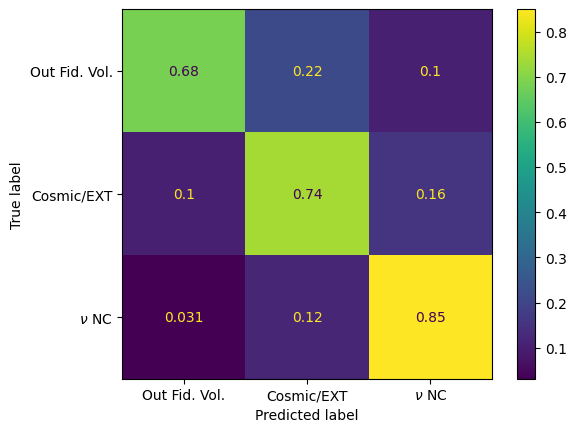

In [15]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Out Fid. Vol.", r"Cosmic/EXT", r"$\nu$ NC"]

# plot your confusion matrix


cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

Plot the importance of your different parameters.

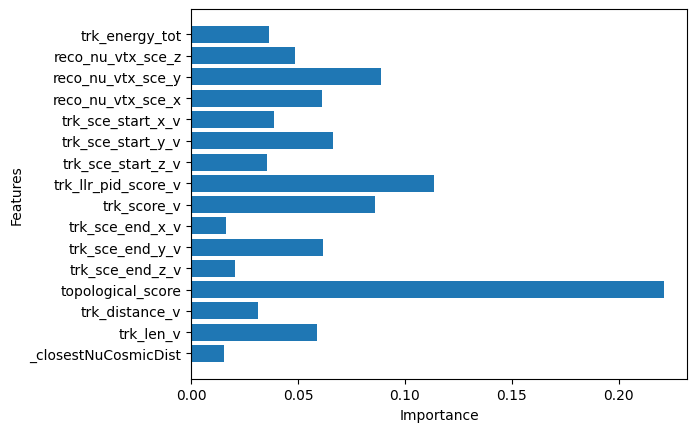

In [16]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [17]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [18]:
"""Single selection on the dataset"""
def ApplySelection(selection, frame, purity_efficiency, totalCount):

    frame = frame[selection]

    signalCount = len(frame[(frame['category'] == 21) | (frame['category'] == 10)])

    purity = signalCount / len(frame)
    efficiency = len(frame) / totalCount

    if purity_efficiency != None:
        purity_efficiency.append((purity, efficiency))

    return frame

def Selections(frame, show_plots=True):
    
    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    # Select the conditions you want to apply, here is an initial condition to get you started.
    purity_efficiency = []
    totalCount = len(frame)

    frame = ApplySelection(((frame['trk_len_v'] > -1000) & (frame['trk_len_v'] < 1000)), frame, None, totalCount)
    frame = ApplySelection((frame['trk_energy_tot'] < 5000.0), frame, None, totalCount)

    frame = ApplySelection((frame['trk_energy_tot'] < 2.0), frame, purity_efficiency, totalCount)
    frame = ApplySelection((frame['topological_score'] > 0.4), frame, purity_efficiency, totalCount)
    frame = ApplySelection((frame['trk_distance_v'] < 5), frame, purity_efficiency, totalCount)
    frame = ApplySelection((frame['reco_nu_vtx_sce_x'] > 50), frame, purity_efficiency, totalCount)
    frame = ApplySelection((frame['reco_nu_vtx_sce_x'] < 200), frame, purity_efficiency, totalCount)

    if not show_plots:
        return frame

    # Plot purity
    purity_values = [val[0] for val in purity_efficiency]

    plt.plot([(i + 1) for i in range(len(purity_efficiency))], purity_values, marker='o', linestyle='-')
    plt.xlabel("Selection Cut")
    plt.ylabel(f"Purity")
    plt.title(f"Purity change over cuts")
    plt.show()

    # Efficiency
    eff_values = [val[1] for val in purity_efficiency]

    plt.plot([(i + 1) for i in range(len(purity_efficiency))], eff_values, marker='o', linestyle='-')
    plt.xlabel("Selection Cut")
    plt.ylabel(f"Efficiency")
    plt.title(f"Efficiency change over cuts")
    plt.show()

    return frame

## Calls the selection function on the dataframes

In [19]:
MC_EXT_CUT = Selections(MC_EXT, False)
data_frame = Selections(data, False)

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [20]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT_CUT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['_closestNuCosmicDist', 'topological_score', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_end_y_v', 'reco_nu_vtx_sce_z', 'trk_range_muon_mom_v', 'trk_mcs_muon_mom_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_y', 'trk_len_v', 'trk_sce_end_z_v', 'trk_sce_start_z_v', 'trk_distance_v', 'category', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_x', 'trk_energy_tot']


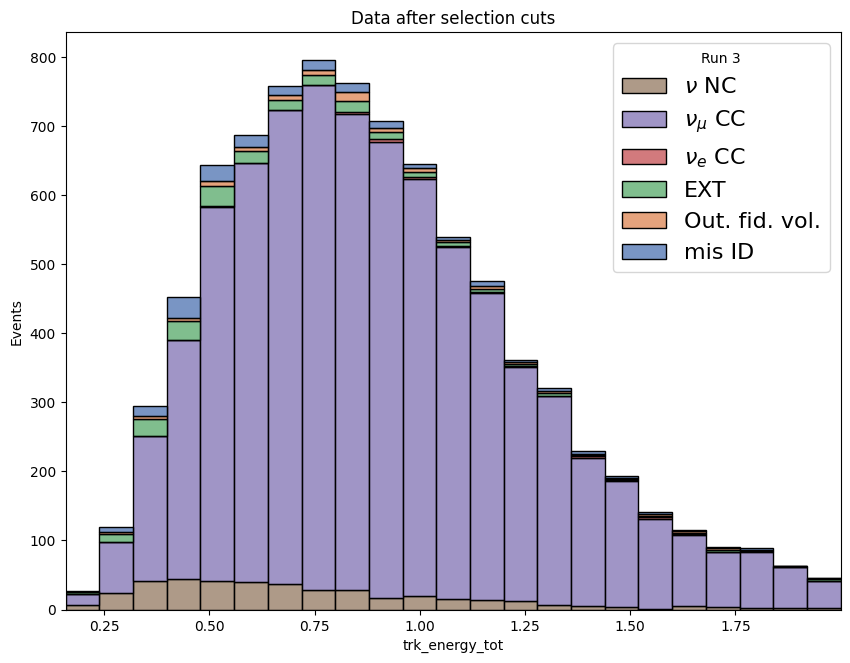

In [21]:
# Simple histogram plot of one variable.
plot_var = 'trk_energy_tot'

plot_dataset = MC_EXT_CUT # data_frame
weights = plot_dataset['weight'] # None

plt.figure(figsize=(10,7.5))
i = sns.histplot(data=plot_dataset, x=plot_var, multiple="stack", hue="category", palette = 'deep', weights = weights, bins = 23, legend = False)
i.set(xlabel=plot_var, ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(plot_dataset[plot_var]), np.max(plot_dataset[plot_var])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.title("Data after selection cuts")
plt.show(i)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

47665 / 9128


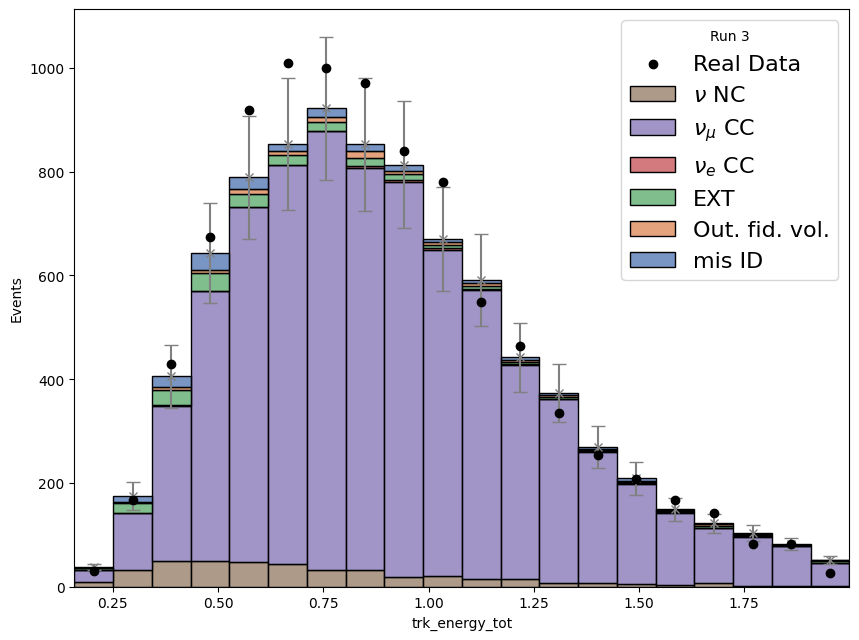

In [22]:
BINS = 20

"""Draws a histogram plot of categorised energy data (MC data) vs real data points"""
def draw_energy_plot(plot_dataset, real_data):
    # Simple histogram plot of one variable.
    print(f"{len(plot_dataset)} / {len(real_data)}")

    plot_var = 'trk_energy_tot'

    weights = plot_dataset['weight']
    real_weights = None
    if 'weight' in real_data:
        real_weights = real_data['weight']

    plt.figure(figsize=(10,7.5))
    i = sns.histplot(data=plot_dataset, x=plot_var, multiple="stack", hue="category", palette = 'deep', bins=BINS, weights = weights, legend = False)
    i.set(xlabel=plot_var, ylabel = "Events")
    
    counts, bin_edges = np.histogram(plot_dataset[plot_var], bins=BINS, weights=weights)
    real_counts, _ = np.histogram(real_data[plot_var], bins=bin_edges, weights=real_weights)

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.scatter(bin_centers, real_counts, color='black', zorder=3)

    # Uncertainty
    for i in range(len(bin_centers)):
        plt.errorbar(bin_centers[i], counts[i], yerr=counts[i] * 0.15, fmt='x', color='gray', capsize=5)

    plt.xlim([np.min(plot_dataset[plot_var]), np.max(plot_dataset[plot_var])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"Real Data", r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    plt.show(i)

draw_energy_plot(MC_EXT_CUT, data_frame)

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [23]:
"""
Length: km
Energy: GeV
"""
def oscillation_probability(sin2theta, delta_m2, length, energy):
    return sin2theta * np.sin(1.27 * delta_m2 * length / energy) ** 2

In [24]:
"""Calculates the chi squared of the energy data fit"""
def get_chi_squared(sim_data, real_data):

  real_weights = None 
  if "weight" in real_data:
    real_weights = real_data["weight"]

  # Bin the data
  sim_hist, _ = np.histogram(sim_data["trk_energy_tot"], BINS, weights=sim_data["weight"]*sim_data["dis_prob"])
  real_hist, _ = np.histogram(real_data["trk_energy_tot"], BINS, weights=real_weights)

  # Calculate chi squared
  chi_squared = 0.0
  for i,_ in enumerate(sim_hist):
    chi_squared += ((sim_hist[i] - real_hist[i])**2) / ((sim_hist[i] * 0.15)**2)

  return chi_squared

# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

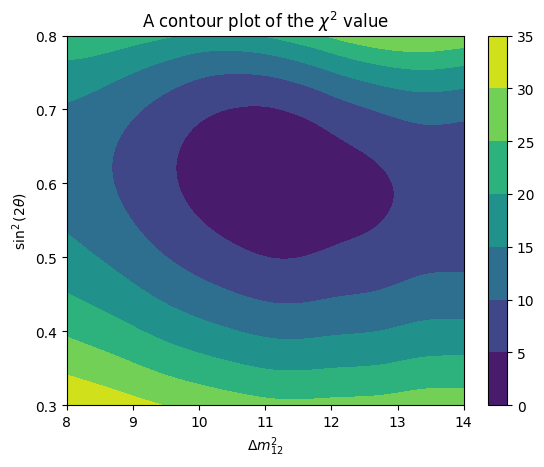

47665 / 47665


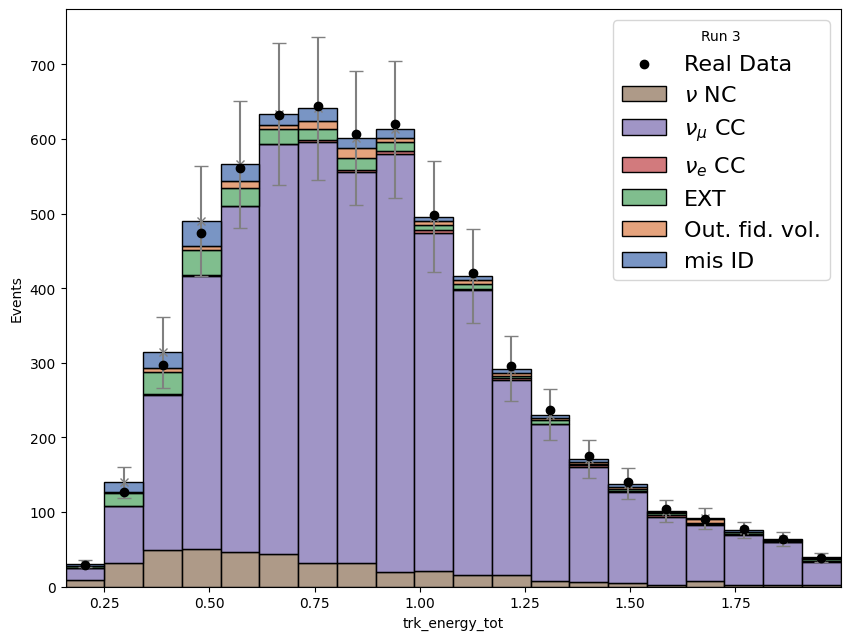

In [25]:
# Selection cuts on oscillated data
oscillated_data = pd.read_pickle(open("data/oscillated_data.pkl", 'rb'))
oscillated_data = Selections(oscillated_data, False)

# Oscillate MC data (scale weight factor)
DIMS = (100,100)

delta_m2 = np.linspace(8.0, 14.0, DIMS[0])
sin2theta = np.linspace(0.3, 0.8, DIMS[1])
xv, yv = np.meshgrid(delta_m2, sin2theta)

chi_squared_values = np.zeros(DIMS)
MC_EXT_CUT["dis_prob"] = 1.0

min_chi_squared = 1000.0
min_loc = None

for i,x in enumerate(sin2theta):
  for j,y in enumerate(delta_m2):
    # Disappearance probability
    dis_prob = 1.0 - oscillation_probability(x, y, 0.475, np.array(MC_EXT_CUT.loc[MC_EXT_CUT["category"] == 21, "true_E"]))
    MC_EXT_CUT.loc[MC_EXT_CUT["category"] == 21, "dis_prob"] = dis_prob

    chi_squared_values[i,j] = get_chi_squared(MC_EXT_CUT, oscillated_data)

    if chi_squared_values[i,j] < min_chi_squared:
      min_chi_squared = chi_squared_values[i,j]
      min_loc = (x,y)

plt.contourf(xv, yv, chi_squared_values)
plt.colorbar()
plt.xlabel(r"$\Delta m_{12}^2$")
plt.ylabel(r"$\sin^2{(2\theta)}$")
plt.title(r"A contour plot of the $\chi^2$ value")
plt.show()

# Plot minimised oscillation
MC_OSC_MIN = MC_EXT_CUT.copy(deep=True)
dis_prob = 1.0 - oscillation_probability(0.61, 11.09, 0.475, np.array(MC_OSC_MIN.loc[MC_OSC_MIN["category"] == 21, "true_E"]))
MC_OSC_MIN.loc[MC_OSC_MIN["category"] == 21, "weight"] *= dis_prob
draw_energy_plot(MC_OSC_MIN, oscillated_data)

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

In [26]:
print(f"Minimum chi squared: {min_chi_squared:.2f} for:")
print(f"  sin^2 (2*theta) = {min_loc[0]:.2f}")
print(f"     Delta m_12^2 = {min_loc[1]:.2f}")

Minimum chi squared: 0.91 for:
  sin^2 (2*theta) = 0.61
     Delta m_12^2 = 11.09


### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

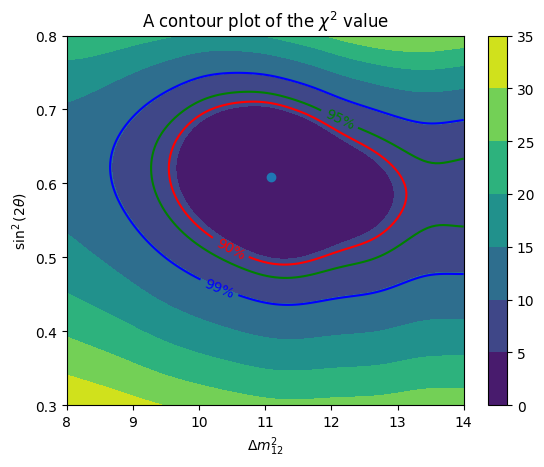

In [27]:
# contour application, with correct confidence levels.

plt.contourf(xv, yv, chi_squared_values)
plt.colorbar()

del_chi2 = [4.61, 5.99, 9.21]
contour = plt.contour(xv, yv, chi_squared_values, levels=[min_chi_squared + x for x in del_chi2], colors=["red","green","blue"])
plt.clabel(contour, fmt={min_chi_squared + del_chi2[0]: "90%", min_chi_squared + del_chi2[1]: "95%", min_chi_squared+del_chi2[2]: "99%"}, inline=True)

plt.scatter([min_loc[1]],[min_loc[0]])

plt.xlabel(r"$\Delta m_{12}^2$")
plt.ylabel(r"$\sin^2{(2\theta)}$")
plt.title(r"A contour plot of the $\chi^2$ value")
plt.show()

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

Minimum (theta, m): (np.float64(0.001), np.float64(0.01))
Minimum chi squared: 21.029903644661108


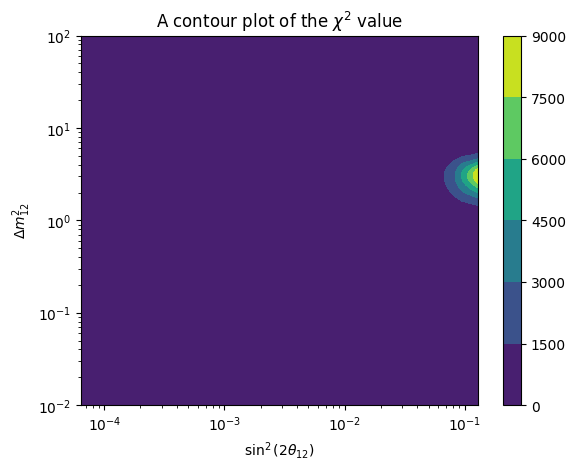

In [28]:

# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

DIMS = (100,100)

delta_m2 = np.logspace(-2, 2, DIMS[0])
sin2theta = np.logspace(-3, 0, DIMS[1])
xv, yv = np.meshgrid(delta_m2, sin2theta)

chi_squared_values = np.zeros(DIMS)
MC_EXT_CUT["dis_prob"] = 1.0

min_chi_squared = 1000.0
min_loc = None

for i,x in enumerate(sin2theta):
  for j,y in enumerate(delta_m2):
    # Disappearance probability
    MC_EXT_CUT.loc[MC_EXT_CUT["category"] == 21, "dis_prob"] = 1.0 - oscillation_probability(x, y, 0.475, np.array(MC_EXT_CUT.loc[MC_EXT_CUT["category"] == 21, "true_E"]))

    chi_squared_values[i,j] = get_chi_squared(MC_EXT_CUT, data_frame)

    if chi_squared_values[i,j] < min_chi_squared:
      min_chi_squared = chi_squared_values[i,j]
      min_loc = (x,y)

print(f"Minimum (theta, m): {min_loc}")
print(f"Minimum chi squared: {min_chi_squared}")

fig, ax = plt.subplots()

# ????
scaled_theta = (1 - np.sqrt(1 - yv)) * (1 - np.sqrt(1 - 0.24))

plt.contourf(scaled_theta, xv, chi_squared_values)
plt.colorbar()

ax.set_xscale("log")
ax.set_yscale("log")

plt.ylabel(r"$\Delta m_{12}^2$")
plt.xlabel(r"$\sin^2{(2\theta_{12})}$")
plt.title(r"A contour plot of the $\chi^2$ value")
plt.show()



# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

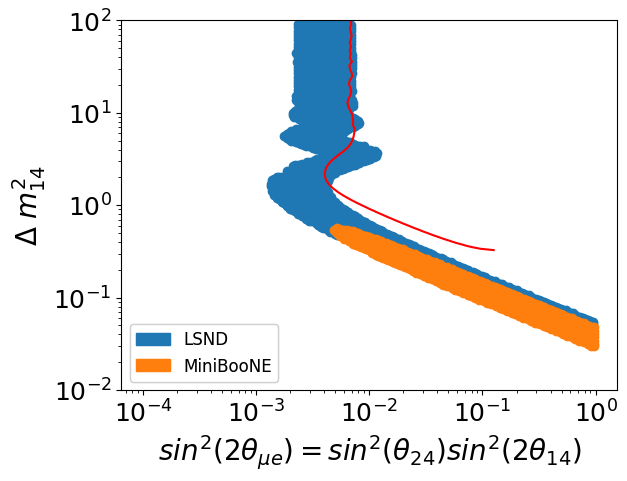

In [29]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)

del_chi2 = 4.61
contour = plt.contour(scaled_theta, xv, chi_squared_values, levels=[min_chi_squared + del_chi2], colors=["red"])

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()